In [46]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly as py
py.offline.init_notebook_mode(connected = True)

from datetime import datetime, timedelta
from datetime import time
import datetime as dt

# filter out warning
import warnings
warnings.filterwarnings("ignore")

This Project Was a Part of Quantium Virtual Internship - Retail Strategy and Analytics I did on Forage. Here I was Assigned to do EDA and find some Insights from it.

In [47]:
ss=pd.read_excel(r"C:\Users\abhis\Downloads\QVI_transaction_data.xlsx")  # Retail Transaction data

In [48]:
df=pd.read_csv(r"C:\Users\abhis\Downloads\QVI_purchase_behaviour.csv") # Customer's purchasing behaviour data

In [49]:
ss.info()  # To check the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [50]:
ss.head()  # Retail Transaction data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [52]:
df.head()   # Customer's purchasing behaviour data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [53]:
td=pd.merge(ss,df,how="inner",on=["LYLTY_CARD_NBR","LYLTY_CARD_NBR"]) # joining the two DataFrame and "LYLTY_CARD_NBR" is the joining Key.

In [54]:
td.head()  # join data of # Retail Transaction data & # Customer's purchasing behaviour data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [55]:
td.rename(columns={"DATE":"Date","STORE_NBR":"Store_No.","LYLTY_CARD_NBR":"Loyalty_Card_No.","TXN_ID":"Transac_ID","PROD_NBR":"Product_No.","PROD_NAME":"Product_Name","PROD_QTY":"Product_Qty","TOT_SALES":"Total_Sales","LIFESTAGE":"LifeStage","PREMIUM_CUSTOMER":"Premium_Customer"},inplace=True)
#Changing the columns name to make it more readble.

In [56]:
td.isna().sum() #cheaking is there any Nan values in the data.

Date                0
Store_No.           0
Loyalty_Card_No.    0
Transac_ID          0
Product_No.         0
Product_Name        0
Product_Qty         0
Total_Sales         0
LifeStage           0
Premium_Customer    0
dtype: int64

In [57]:
td[td.duplicated(keep= False)] # To find out if there any Duplicated Data

,Date,Store_No.,Loyalty_Card_No.,Transac_ID,Product_No.,Product_Name,Product_Qty,Total_Sales,LifeStage,Premium_Customer
126408,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium
126410,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium


In [58]:
td.drop_duplicates(keep='first', inplace= True) 
# removing the only Duplicated row I found. 

In [59]:
td=td[td['Product_Name'].str.contains('Chips | Chip | Waves | chps', case= False,regex=True)]
# The data have various products other than chips. But since I want only chips related data so I'm extracting only those rows.
# which contains "Chips | Chip | Waves | chps" in the Product_Name column. 
# Here I'm assuming that chips products have these keywords ('Chips | Chip | Waves | chps') in their names.

In [60]:
td['Brands']=td['Product_Name'].str.split().str[0]
# To extract the Brand Name from the "Product_Name" variable
# assuming Brand name starts from the begingiing of the any product name

In [61]:
# To get the brands name along with their Total Quntity and Total Sales. Sort by Total Sales from Highest to Lowest
td.groupby('Brands')["Product_Qty","Total_Sales"].agg('sum').sort_values(by='Total_Sales',ascending=False)

,Product_Qty,Total_Sales
Brands,,
Smiths,31999,129237.8
Doritos,30389,127597.3
Thins,26929,88852.5
Kettle,18354,84419.2
Cobs,18571,70569.8
Grain,11962,43048.8
WW,14029,26655.1
Natural,5755,17265.0
French,2643,7929.0


In [62]:
td["Product_Size"]=td["Product_Name"].str[-4:] # Extracting the Weights from the end to Create a new Column.

In [63]:
#This are the Top 5 products in chips sales
td['Product_Name']=td['Product_Name'].str.split('\d+g').str[0]
# Removing all the weights from the text so that we can group by only the Product Name

In [64]:
#This are the Top 5 chips products by sales
td.groupby('Product_Name')[['Product_Qty','Total_Sales']].sum().sort_values(by='Total_Sales',ascending=False).head()

,Product_Qty,Total_Sales
Product_Name,,
Smiths Crnkle Chip Orgnl Big Bag,6164,36367.6
Smiths Crinkle Chips Salt & Vinegar,6106,34804.2
Kettle Tortilla ChpsHny&Jlpno Chili,6309,29021.4
Kettle Tortilla ChpsBtroot&Ricotta,6037,27770.2
Kettle Tortilla ChpsFeta&Garlic,6008,27627.6


In [65]:
# Which Product_Size Sold the Most ?
td.groupby('Product_Size')['Transac_ID','Product_Qty','Total_Sales'].agg({'Product_Qty':'sum','Total_Sales':'sum','Transac_ID':'count'}).rename(columns={'Transac_ID':'No_of_Purchase'}).sort_values(by='Total_Sales',ascending=False)

,Product_Qty,Total_Sales,No_of_Purchase
Product_Size,,,
175g,43875,139690.5,23060
150g,30565,132042.1,15956
170g,29359,112396.4,15413
110g,18571,70569.8,9693
380g,6164,36367.6,3233
330g,6106,34804.2,3197
210g,6031,21700.8,3167
210G,5931,21348.0,3105
200g,8425,16007.5,4473


In [66]:
td=td[["Date","Store_No.","Loyalty_Card_No.","Transac_ID","Product_No.","Product_Name","Brands","Product_Size","Product_Qty","Total_Sales","LifeStage","Premium_Customer"]]
td
#Set the Columns in a right way

In [67]:
# To Undestand these two varibles through summary Statstics. 
# And to Detect whether these two have any Outliners.
td[['Product_Qty','Total_Sales']].describe()

,Product_Qty,Total_Sales
count,84267.000000,84267.000000
mean,1.906215,7.067707
std,0.339697,2.232019
min,1.000000,1.900000
25%,2.000000,6.000000
50%,2.000000,7.200000
75%,2.000000,8.800000
max,5.000000,29.500000


In [68]:
td[['Product_Qty','Total_Sales']].median()

Product_Qty    2.0
Total_Sales    7.2
dtype: float64

In [69]:
td[['Product_Qty','Total_Sales']].mode()

,Product_Qty,Total_Sales
0,2,6.6


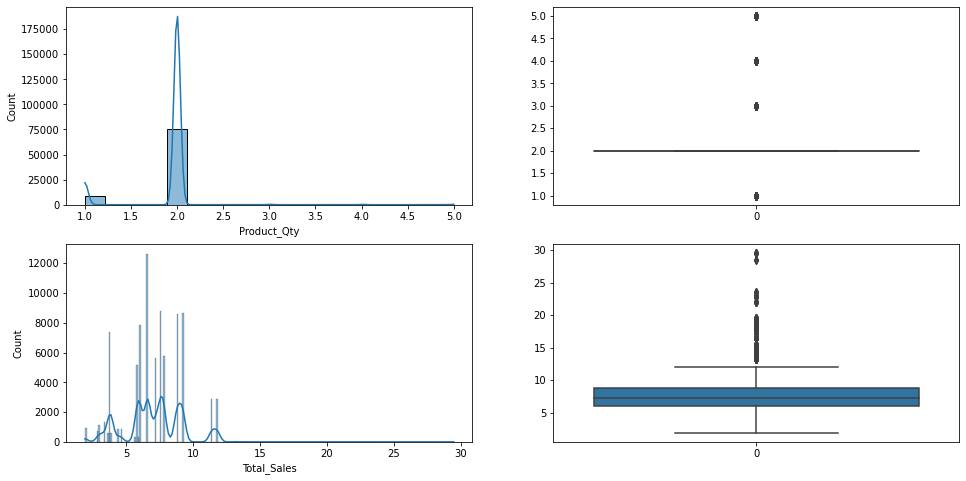

In [70]:
#Here I try to detect Outliners from both the Variables
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(td['Product_Qty'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = td['Product_Qty'])

plt.subplot(2,2,3)
sns.histplot(td['Total_Sales'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = td['Total_Sales'])

plt.show()

In [71]:
# the Boxplot graph shows that both the variables have Outliners.
fig = px.box(td, y="Total_Sales")
fig.show()

In [72]:
# "Product_Qty" Columns outliners were starting from the value 3.
# Here I'm showing all the Transactions That were Causing the Outliners.
td[td['Product_Qty']>3.0]

,Date,Store_No.,Loyalty_Card_No.,Transac_ID,Product_No.,Product_Name,Brands,Product_Size,Product_Qty,Total_Sales,LifeStage,Premium_Customer
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,Smiths,175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
458,2019-05-20,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips,Cobs,110g,5,19.0,MIDAGE SINGLES/COUPLES,Budget
467,2019-05-15,133,133250,137666,30,Doritos Corn Chips Cheese Supreme,Doritos,170g,4,17.6,MIDAGE SINGLES/COUPLES,Budget
575,2019-05-17,168,168219,170719,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,Cobs,110g,4,15.2,MIDAGE SINGLES/COUPLES,Budget
623,2018-08-20,186,186401,188768,1,Smiths Crinkle Cut Chips Barbecue,Smiths,170g,5,14.5,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
258558,2019-05-14,1,1289,329,96,WW Original Stacked Chips,WW,160g,4,7.6,YOUNG SINGLES/COUPLES,Premium
258792,2019-05-17,88,88142,86924,78,Thins Chips Salt & Vinegar,Thins,175g,5,16.5,YOUNG SINGLES/COUPLES,Premium
259068,2019-05-14,183,183032,184969,21,WW Sour Cream &OnionStacked Chips,WW,160g,5,9.5,YOUNG SINGLES/COUPLES,Premium
259156,2018-08-20,203,203253,203360,28,Thins Potato Chips Hot & Spicy,Thins,175g,5,16.5,YOUNG SINGLES/COUPLES,Premium


In [73]:
# "Total_Sales" Columns outliners were starting from the value 14.500.
# Here I'm showing all the Transactions That were Causing the Outliners.
td[td['Total_Sales']>14.500000]

,Date,Store_No.,Loyalty_Card_No.,Transac_ID,Product_No.,Product_Name,Brands,Product_Size,Product_Qty,Total_Sales,LifeStage,Premium_Customer
5,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,Smiths,175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
458,2019-05-20,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips,Cobs,110g,5,19.0,MIDAGE SINGLES/COUPLES,Budget
467,2019-05-15,133,133250,137666,30,Doritos Corn Chips Cheese Supreme,Doritos,170g,4,17.6,MIDAGE SINGLES/COUPLES,Budget
575,2019-05-17,168,168219,170719,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,Cobs,110g,4,15.2,MIDAGE SINGLES/COUPLES,Budget
726,2019-05-17,222,222209,222693,40,Thins Chips Seasonedchicken,Thins,175g,5,16.5,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
239206,2019-05-16,132,132508,135945,108,Kettle Tortilla ChpsHny&Jlpno Chili,Kettle,150g,5,23.0,YOUNG SINGLES/COUPLES,Mainstream
239808,2018-08-17,197,197279,197208,30,Doritos Corn Chips Cheese Supreme,Doritos,170g,4,17.6,YOUNG SINGLES/COUPLES,Mainstream
240334,2019-05-18,238,238337,243243,28,Thins Potato Chips Hot & Spicy,Thins,175g,5,16.5,YOUNG SINGLES/COUPLES,Mainstream
258792,2019-05-17,88,88142,86924,78,Thins Chips Salt & Vinegar,Thins,175g,5,16.5,YOUNG SINGLES/COUPLES,Premium


In [74]:
# During which month did the company have the highest sales?
td.groupby(td['Date'].dt.month)['Total_Sales','Product_Qty'].sum().sort_values(by='Total_Sales',ascending=False)

,Total_Sales,Product_Qty
Date,,
12,52134.9,14061
7,51644.1,13921
3,51114.5,13858
10,50873.9,13716
1,50486.4,13548
6,49631.7,13463
11,49389.0,13340
4,49031.4,13263
9,48927.3,13200


In [75]:
months = ['Dec','Jul', 'Mar', 'Oct', 'Jan', 'Jun',
          'Nov', 'Apr', 'Sep', 'Aug', 'May', 'feb']
colors = ['lightslategray',] * 12
colors[1] = 'crimson'
fig = px.bar(pd.DataFrame(td.groupby(td['Date'].dt.month)['Total_Sales','Product_Qty'].sum().sort_values(by='Total_Sales',ascending=False)),x=months, y = "Total_Sales",
title="December is the Highest Sales Month of the Year", text_auto=True,
color=months,color_discrete_map={'Dec':'orange', 'Jul':'blue', 'Mar':'blue', 'Oct':'blue', 
                              'Jan':'blue','Jun':'blue', 'Nov':'blue', 'Apr':'blue','Sep':'blue','Aug':'blue','May':'blue','feb':'blue'})
fig.update_traces(showlegend=False)
fig.update_xaxes(
        title_text = "Months",
        title_font = {"size": 16})
fig.show()

In [76]:
x=td.groupby(['Premium_Customer','LifeStage'])['Total_Sales'].sum().unstack(level=0)
x

Premium_Customer,Budget,Mainstream,Premium
LifeStage,,,
MIDAGE SINGLES/COUPLES,11279.3,28357.2,17761.6
NEW FAMILIES,6633.4,5293.5,3642.1
OLDER FAMILIES,51457.6,32669.7,24041.9
OLDER SINGLES/COUPLES,42236.4,41108.0,40804.8
RETIREES,35214.8,47974.3,29147.8
YOUNG FAMILIES,42749.9,28852.3,25834.9
YOUNG SINGLES/COUPLES,18875.1,48429.7,13210.2


In [77]:
fig = px.bar(x,labels='Total_Sales',text_auto=True,width=1420, height=600)
fig.show()

In [78]:
z=td.groupby('Premium_Customer')['Total_Sales'].sum().sort_values(ascending=False)
z

Premium_Customer
Mainstream    232684.7
Budget        208446.5
Premium       154443.3
Name: Total_Sales, dtype: float64

Text(0.5, 1.0, 'Total Sales Distribution of Premium Customer')

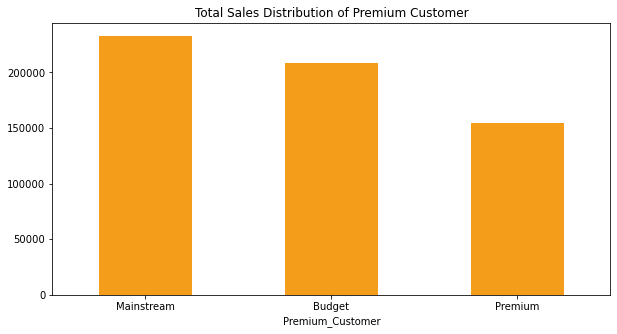

In [79]:
plt.figure(figsize=(10, 5))
z.plot.bar(color='#F49D1A')
plt.xticks(rotation = 0)
plt.title('Total Sales Distribution of Premium Customer')

Text(0.5, 1.0, '5 Top Most Loyal Customers')

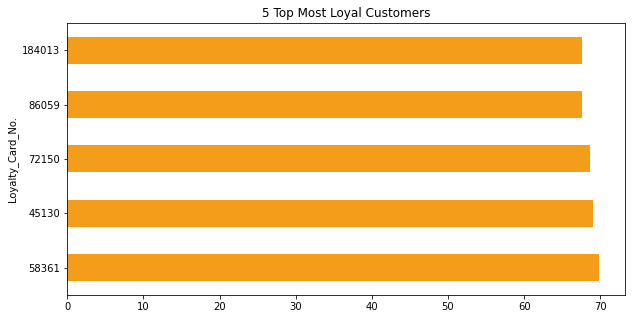

In [80]:
plt.figure(figsize=(10, 5))
td.groupby('Loyalty_Card_No.')['Total_Sales'].sum().sort_values(ascending=False).head().plot(kind='barh',color='#F49D1A')
plt.title('5 Top Most Loyal Customers')


Here is My Findings :
- 175 , 150, 170 grams size of product sold the most.
- December is the Highest Sales Month of the Year.
- In the Customer Segment, Mainstream Customers are purchasing most.
- the data have outliners. But when I dig into those Outliners, I found that These Transacions were normal retail purchasing and were not done for bulk purchases.
- I also Find the Top 5 products by sales. "Smiths Crnkle Chip Orgnl Big Bag" is the top most product by sales.
- "Smiths", "Doritos", "Thins" are the top 3 Brands in our dataset.
- 58361,45130,72150,86059,184013  These are the Top 5 Loyal Customer's LOyalty Card NO.